In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 1000)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import createXYPlot
from datetime import datetime

today = str(datetime.now().date())
print(today)
plots_folder = f"./plots/{today}/iss"
os.system(f"mkdir -p {plots_folder}")

2022-01-15


0

### Iss data

In [2]:
df_ti = pd.read_csv("./data/rapporti_ISS - TI.csv")
df_decessi = pd.read_csv("./data/rapporti_ISS - Decessi.csv")
df_ricoveri = pd.read_csv("./data/rapporti_ISS - Ricoveri.csv")
df_contagi = pd.read_csv("./data/rapporti_ISS - Contagi.csv")
df_pop = pd.read_csv("./data/rapporti_ISS - Popolazione.csv")

In [3]:
cols_to_select = [x for x in df_pop.columns if "frac" not in x and x != "cut"]
df_pop = df_pop[cols_to_select]
df_pop["data"] = pd.to_datetime(df_pop["data"]).dt.date
df_pop = df_pop.rename(columns={"data":"data_pop"})
df_pop

,data_pop,fascia_eta,no_vax,1_dose,2_dosi_lt_cut,2_dosi_gt_cut,booster,vax
0,2021-12-19,12-39,2765891,777996,7068764,6157614,666000,14670374
1,2021-12-19,40-59,2553007,493603,3396844,10069702,1918446,15878595
2,2021-12-19,60-79,1136914,224964,1066673,8153620,2989837,12435094
3,2021-12-19,80+,204451,82201,116336,1638547,2528535,4365619
4,2021-12-19,totale,6660263,1578764,11648617,26019483,8102818,47349682
5,2021-12-12,12-39,2892447,725242,8126842,5268071,423663,14543818
6,2021-12-12,40-59,2613841,477140,3966242,10284069,1090310,15817761
7,2021-12-12,60-79,1161325,220084,1369229,8856454,1964916,12410683
8,2021-12-12,80+,209075,81702,123583,1939660,2216050,4360995
9,2021-12-12,totale,6876688,1504168,13585896,26348254,5694939,47133257


In [4]:
df_dict = {
    "contagi": df_contagi,
    "ricoveri": df_ricoveri,
    "terapie_intensive": df_ti, 
    "decessi": df_decessi
}

In [5]:
for d in df_dict.items():
    d[1]["split"] = d[0]

In [6]:
df_iss = pd.concat(df_dict.values()).reset_index(drop=True)
df_iss["tot"] = df_iss["vax"] + df_iss["no_vax"]
df_iss["data"] = pd.to_datetime(df_iss["data"]).dt.date

In [7]:
#df_iss["data"] = pd.to_datetime(df_iss["data"]).dt.date
#var_dict = {
#    "terapie_intensive": "ingressi_terapia_intensiva",
#    "diagnosi": "nuovi_positivi",
#    "decessi": "variazione_deceduti"
#           }

#for key in var_dict.keys():
#    df_daily[var_dict[key]+"_last_month"] = df_daily.apply(lambda x: 
#                                                 df_daily.loc[(df_daily.data > x.data_prev_month) & 
#                                                              (df_daily.data <= x.data), var_dict[key]].sum(), axis=1)
#
#    df_final = df_daily.merge(df_iss, on=["data"], how="inner")
#    #display(df_final[df_final.split==key][["data", "tot", var_dict[key] + "_last_month"]])

In [8]:
age_values = df_iss["fascia_eta"].unique()
splits = df_iss["split"].unique()

In [9]:
from datetime import timedelta
df_iss["data_pop"] = df_iss["data"].apply(lambda x: x - timedelta(14))

In [10]:
df_iss = df_iss.merge(df_pop, on=["data_pop","fascia_eta"], how="left", suffixes=("","_pop"))

### Incidence

In [214]:
vnames = ["no_vax", "1_dose", "2_dosi_lt_cut", "2_dosi_gt_cut", "booster"]
for v in vnames:
    df_iss[f"{v}_100k"] = (1e5)*df_iss[v]/df_iss[f"{v}_pop"]

,data,2_dosi_gt_cut,no_vax,no_vax_pop,2_dosi_gt_cut_pop
139,2021-10-17,85,361,NaN,NaN
144,2021-10-24,135,384,NaN,NaN
149,2021-10-31,191,449,NaN,NaN
154,2021-11-07,482,515,8302865.0,3884826.0
159,2021-11-14,604,620,7862567.0,4186423.0
164,2021-11-21,745,722,7586013.0,4526706.0
169,2021-11-28,838,839,7404599.0,11407859.0
174,2021-12-05,1108,994,7291722.0,11949919.0
179,2021-12-12,1298,1170,7160934.0,12254673.0


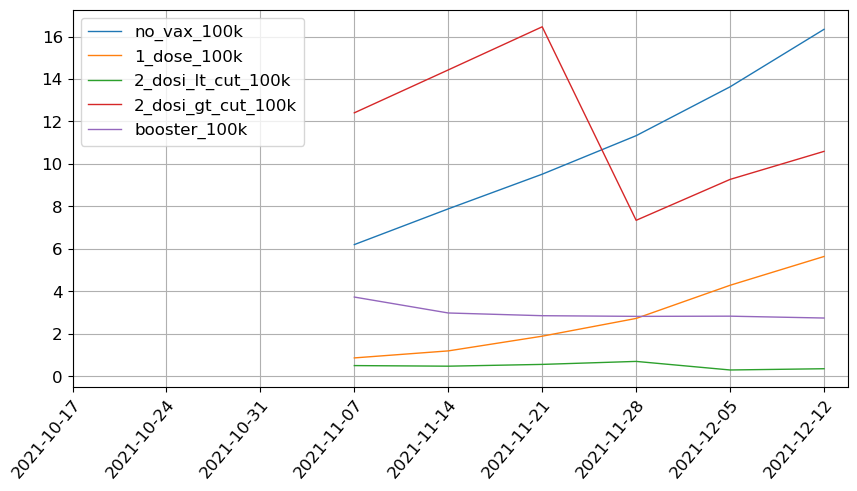

In [229]:
df_plt = df_iss[(df_iss.split=="decessi") & (df_iss.fascia_eta=="totale")]
display(df_plt[["data","2_dosi_gt_cut", "no_vax", "no_vax_pop", "2_dosi_gt_cut_pop"]])
vplot = [f"{v}_100k" for v in vnames]
createXYPlot(df_plt,
             x="data",
             y=vplot,
             plots_folder=plots_folder,
             days_interval=1
            )

In [11]:
df_iss[["data","split","fascia_eta","no_vax_100k","booster","booster_100k","booster_pop","cut"]][(df_iss.fascia_eta=="12-39") & (df_iss.split=="contagi")].sort_values(by=["split","data","fascia_eta"])

KeyError: "['no_vax_100k', 'booster_100k'] not in index"

In [17]:
def plot_vax_vs_no_vax(age: str, 
                       split: str):
    
    plt.figure(dpi=100, figsize=(10,5))
    df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)].reset_index()
    title = f"{split}"
    if age != "totale":
        title += f" {age}"
    createXYPlot(df_plt,
                 y=["no_vax_frac"],
                 labels=["frazione non vaccinati"],
                 colors=["r"],
                 x="data",
                 plots_folder="./plots",
                 days_interval=1,
                 linewidth=1.8,
                 title=title.replace("_"," ")
                )

<Figure size 1000x500 with 0 Axes>

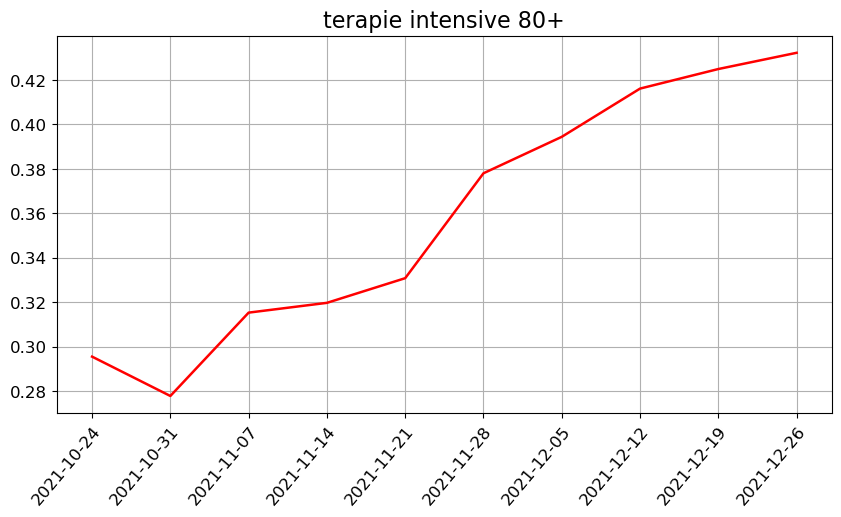

In [18]:
plot_vax_vs_no_vax("80+", "terapie_intensive")

In [33]:
df_iss["no_vax_frac_err"] = 1.645*np.sqrt((df_iss["no_vax_frac"]*df_iss["vax_frac"])/(df_iss["no_vax"] + df_iss["vax"]))
df_iss["no_vax_frac_err_lo"] = df_iss["no_vax_frac"] - df_iss["no_vax_frac_err"]
df_iss["no_vax_frac_err_hi"] = df_iss["no_vax_frac"] + df_iss["no_vax_frac_err"]

In [31]:
df_iss[["no_vax","vax","no_vax_frac","no_vax_frac_sd"]]

,no_vax,vax,no_vax_frac,no_vax_frac_sd
0,18568,14693,0.5583,0.004479
1,15027,20939,0.4178,0.004278
2,5364,14510,0.2699,0.005180
3,1223,5626,0.1786,0.007613
4,40182,55768,0.4188,0.002620
5,23176,20747,0.5277,0.003919
6,19051,28671,0.3992,0.003688
7,6797,19719,0.2563,0.004410
8,1540,7002,0.1803,0.006842
9,50564,76139,0.3991,0.002263


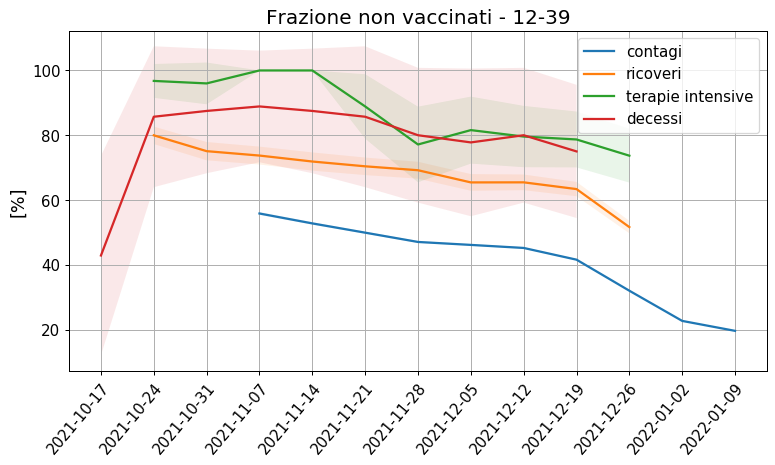

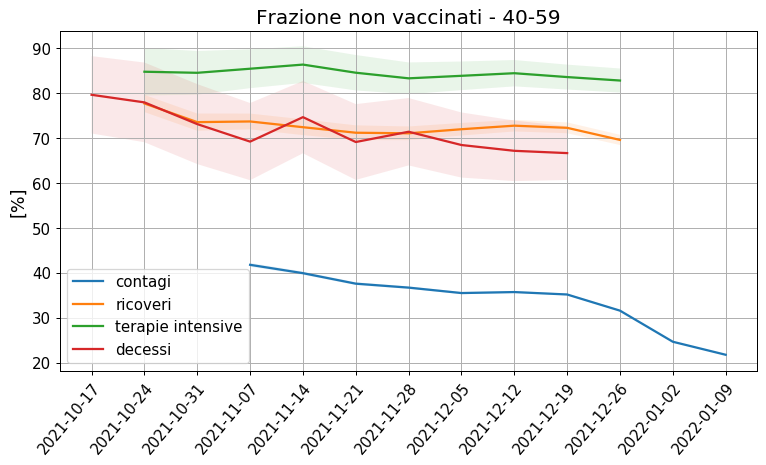

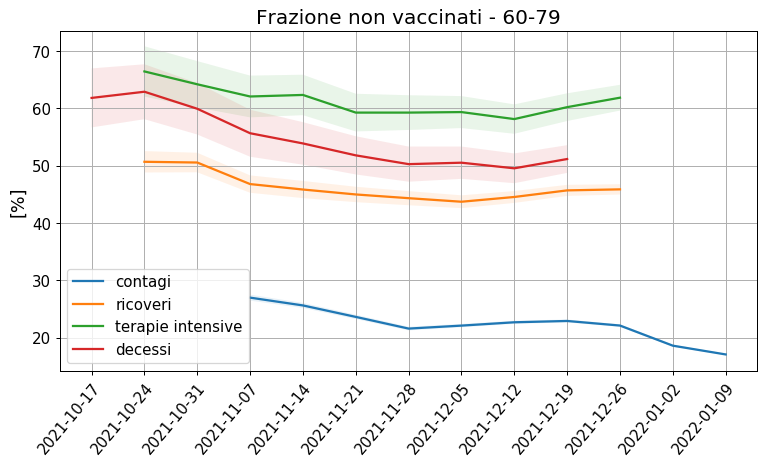

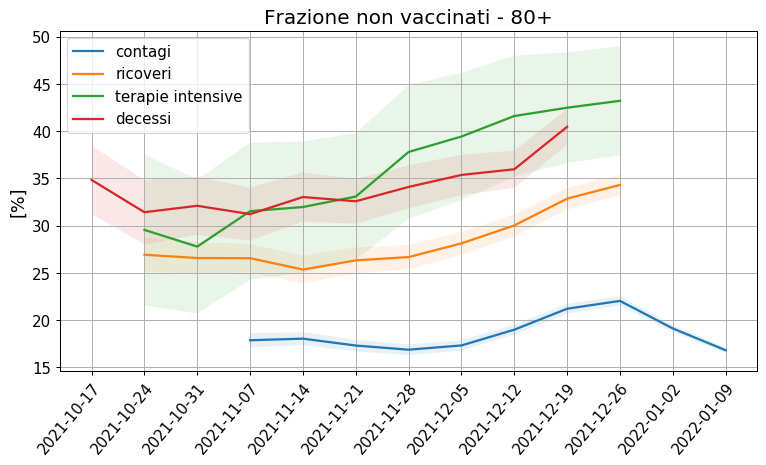

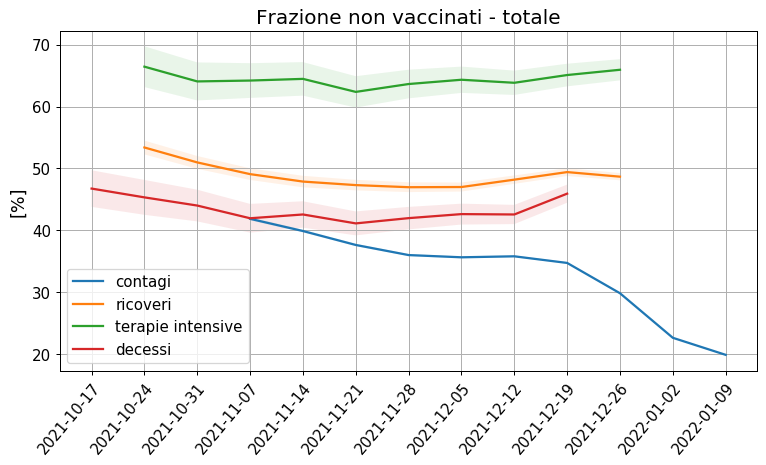

In [34]:
for age in sorted(age_values):
    plt.figure(dpi=90, figsize=(10,5))
    dates_str = []
    dates = []
    for split in ["contagi", "ricoveri", "terapie_intensive", "decessi"]:
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        dates_str += [x.strftime("%Y-%m-%d") for x in df_plt.data.unique()]
        dates += [x for x in df_plt.data.unique()]
        plt.plot(df_plt.data,
                 100*df_plt.no_vax_frac,
                 label=split.replace("_"," "),
                 linewidth=1.8
                )
        plt.fill_between(df_plt.data, 
                     100*df_plt.no_vax_frac_err_lo, 
                     100*df_plt.no_vax_frac_err_hi,
                     alpha=0.1
                    )
    title = f"Frazione non vaccinati - {age}"
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("[%]",fontsize=14)
    
    dates_str = sorted(list(set(dates_str)), reverse=False)
    dates = sorted(list(set(dates)), reverse=False)
    plt.xticks(dates,
               dates_str,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right")
    plt.savefig(f"{plots_folder}/frazione_no_vax_{age}",bbox_inches="tight")

In [13]:
def plot_var_ages(split, varname="vax"):
    plt.figure(dpi=90, figsize=(10,5))
    for age in sorted(age_values):
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split=="terapie_intensive")]
        plt.plot(df_plt.data,
            df_plt[varname],
            label=age,
            linewidth=1.8)
    title = f"Totale {varname} {split}".replace("_", " ")
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(df_plt.data,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right"
              )

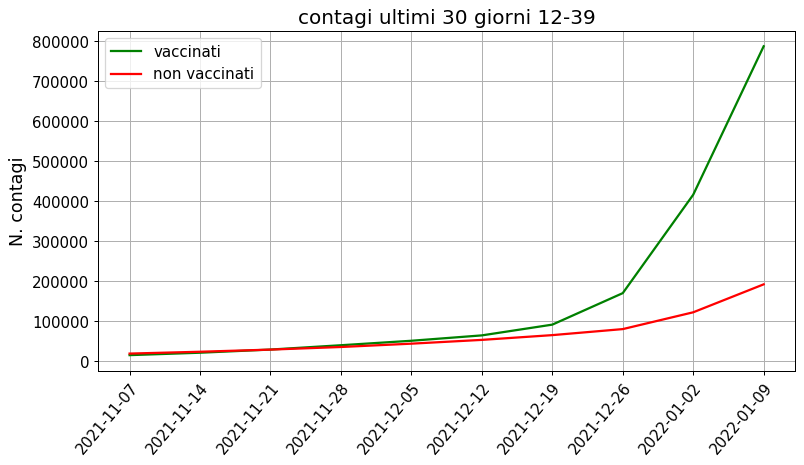

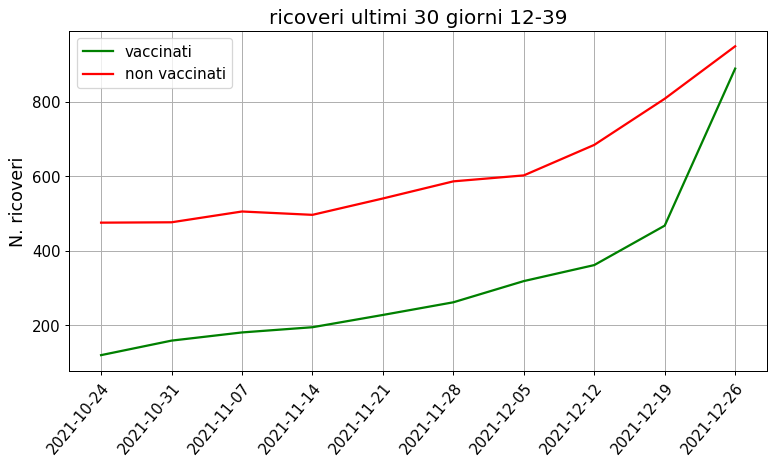

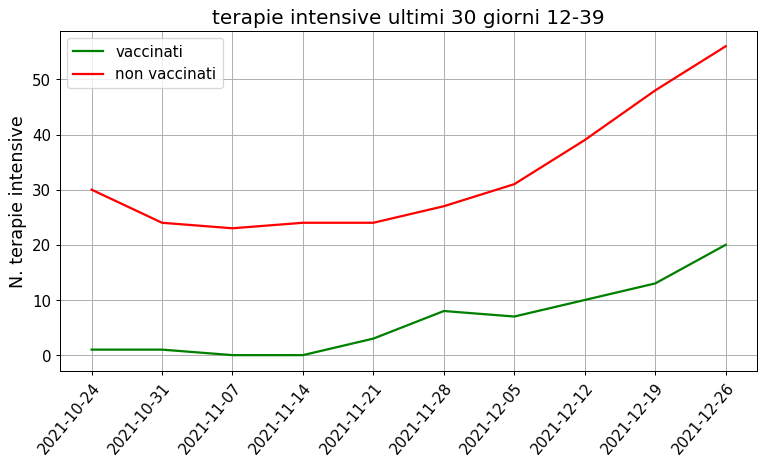

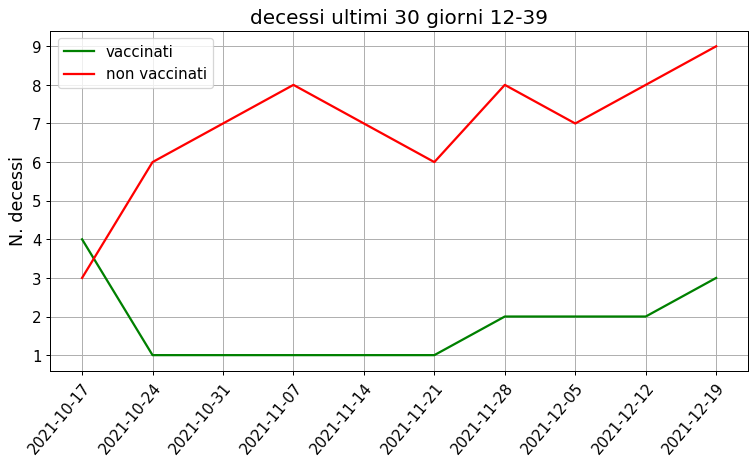

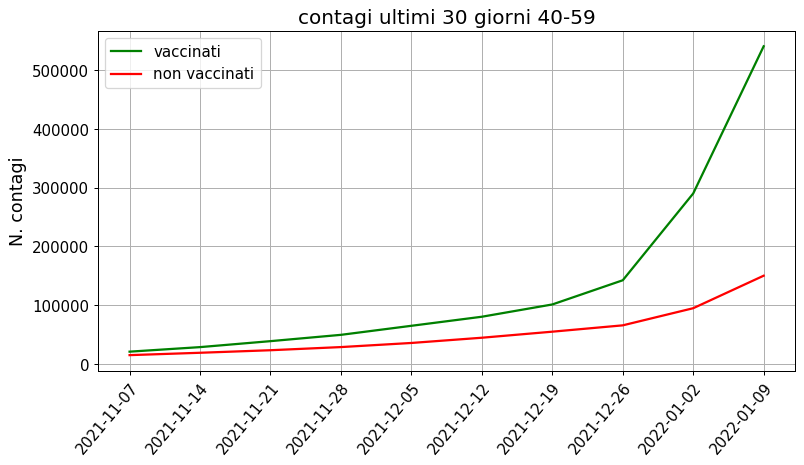

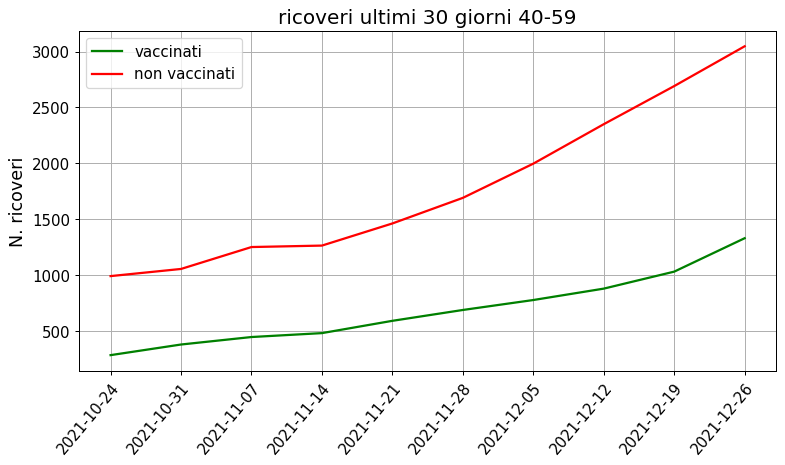

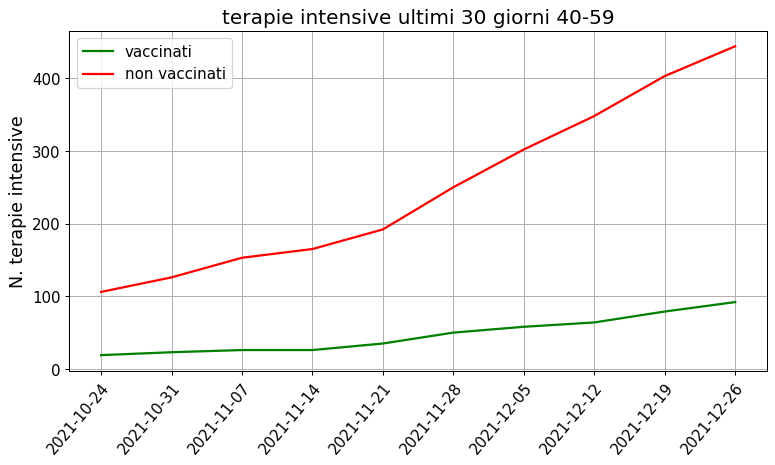

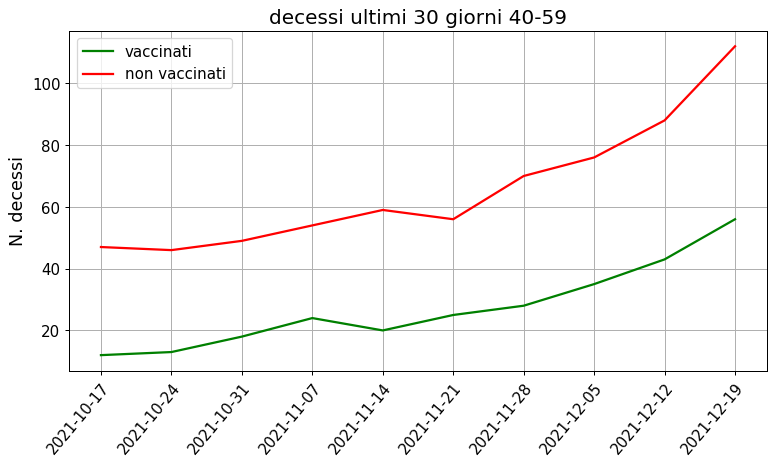

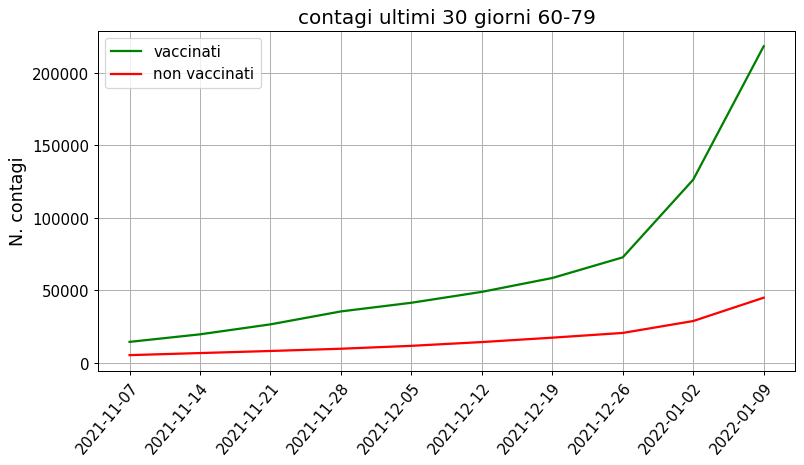

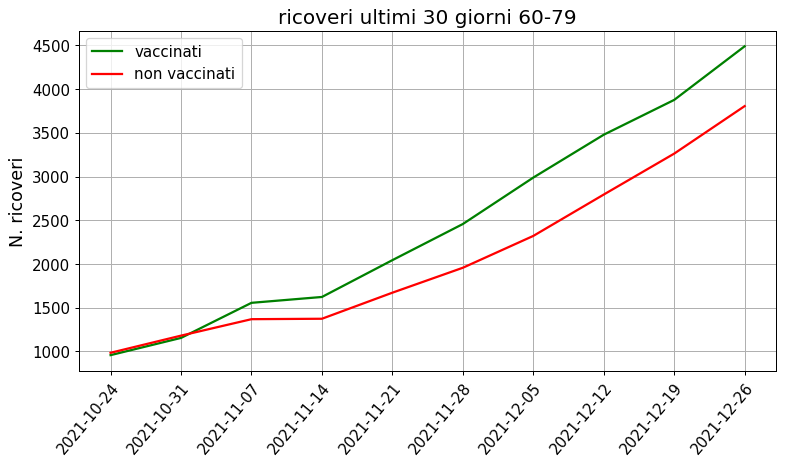

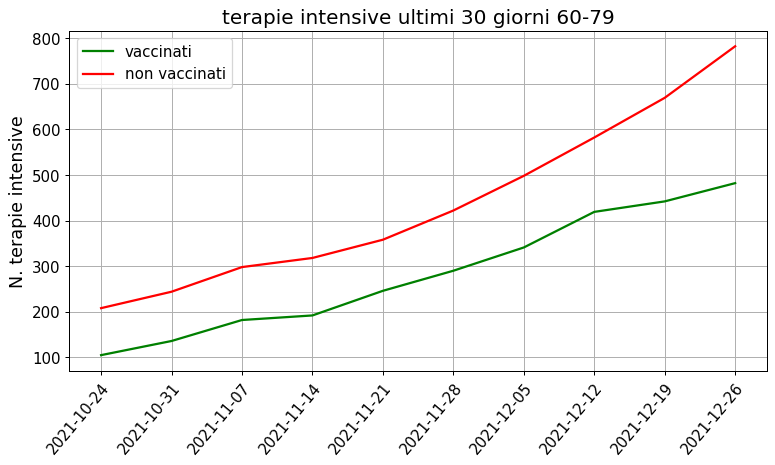

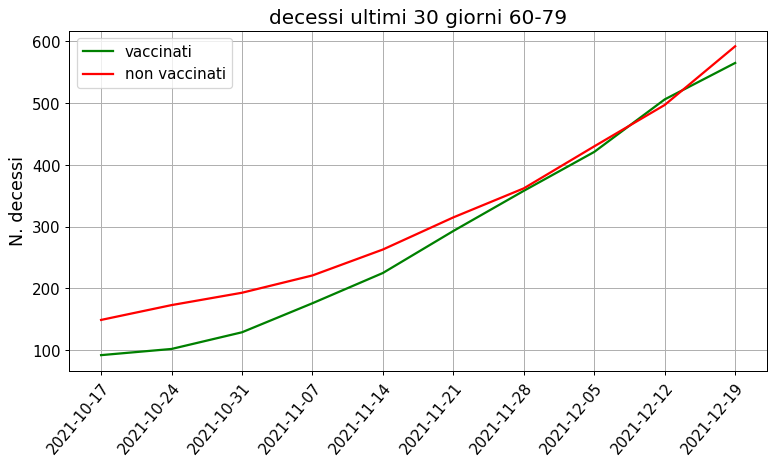

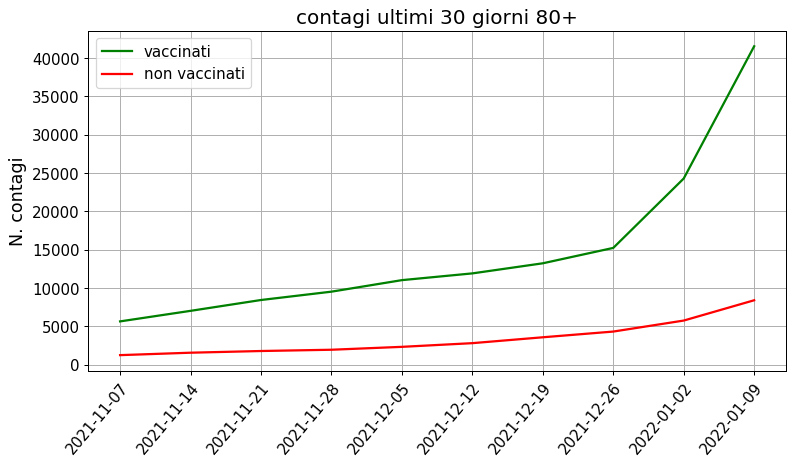

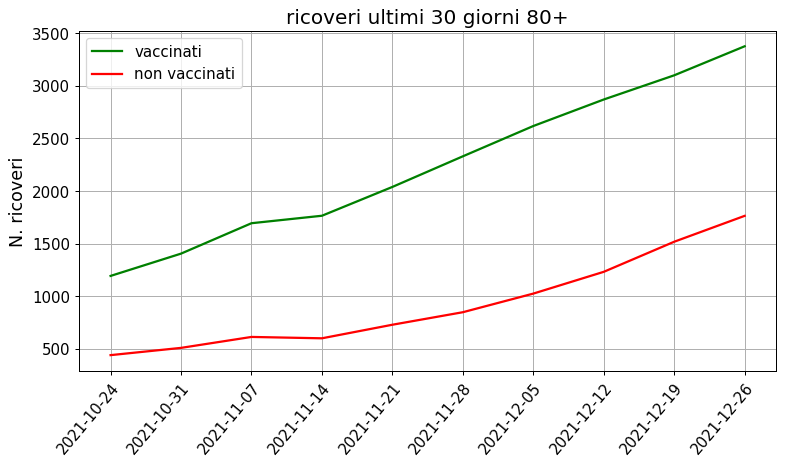

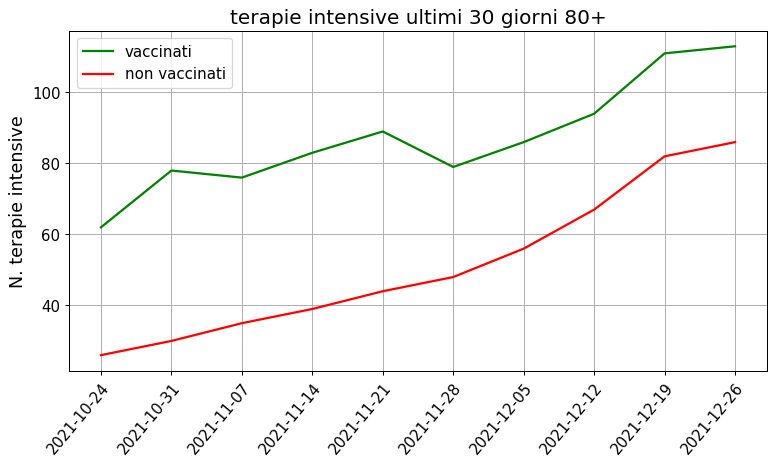

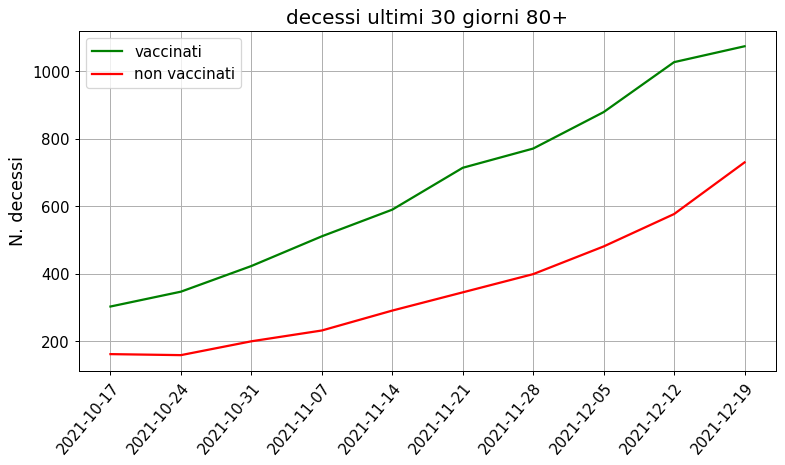

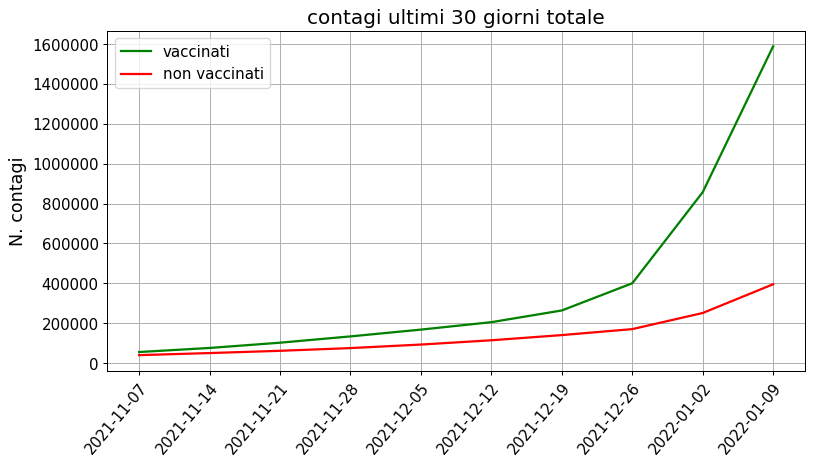

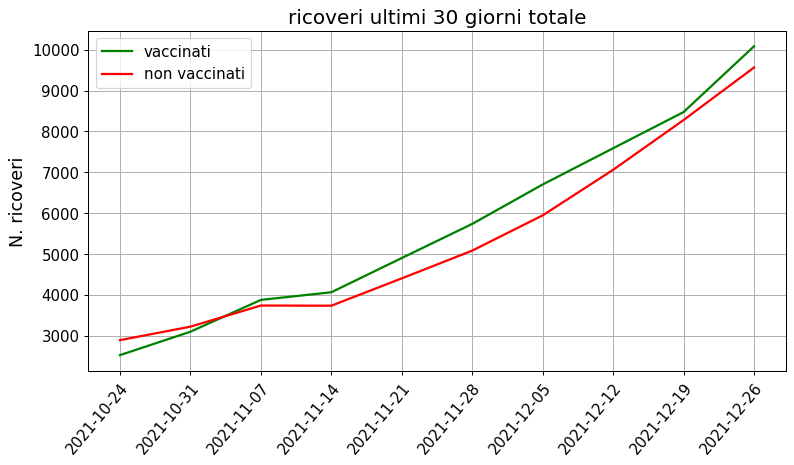

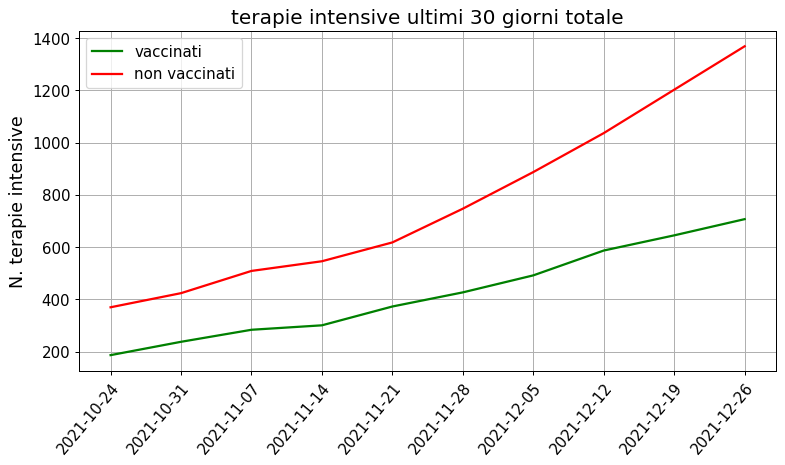

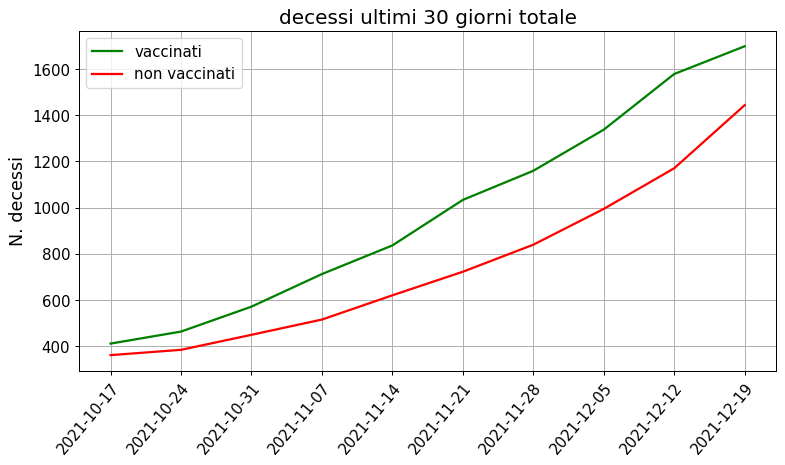

In [14]:
for age in age_values:
    for split in splits:
        df_plt = df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        savename = f"{split}_{age}"
        yvars = ["vax", "no_vax"]
        savename += "_" + "_".join(yvars)
        createXYPlot(df_plt,
                     y=yvars,
                     x="data",
                     labels=["vaccinati", "non vaccinati"],
                     colors=["g","r"],
                     plots_folder=plots_folder,
                     linewidth=1.8,
                     days_interval=1,
                     title=f"{split} ultimi 30 giorni {age}".replace("_"," "),
                     savename=savename,
                     ytitle=f"N. {split}".replace("_"," "),
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90
                    )

In [15]:
def get_lethality(df: pd.DataFrame, 
                  savename: str,
                  yscale: str ="linear"
                 ):

    value_cols = ["vax",
                  "no_vax",
                  "1_dose",
                  "2_dosi_lt_cut",
                  "2_dosi_gt_cut",
                  "booster",
                 ]
    df_pivot = df.pivot(index='data',columns=["split"],values=value_cols)
    cols = []
    for i in range(0,len(df_pivot.columns)):
        cols.append(df_pivot.columns.get_level_values(1)[i] + '_' + df_pivot.columns.get_level_values(0)[i])
    df_pivot.columns = cols

    for v in value_cols:
        df_pivot[f"letalita_{v}"] = df_pivot[f"decessi_{v}"]/df_pivot[f"diagnosi_{v}"]
        df_pivot[f"sd_letalita_{v}"] = np.sqrt(df_pivot[f"letalita_{v}"] * (1 - df_pivot[f"letalita_{v}"]) / df_pivot[f"diagnosi_{v}"])
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] - 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"hi_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] + 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"lo_err_letalita_{v}"].apply(lambda x: 0 if x < 0 else x)
    
    dates = df_pivot.dropna().index
    plt.figure(figsize=(10,5),dpi=90)
    for y in ["no_vax", "1_dose", "2_dosi_lt_cut", "2_dosi_gt_cut", "booster"]:
        plt.plot(df_pivot.index, 
                 100*df_pivot[f"letalita_{y}"],
                 label=y,
                 linewidth=1.8
                )
        plt.fill_between(df_pivot.index, 
                     100*df_pivot[f"lo_err_letalita_{y}"], 
                     100*df_pivot[f"hi_err_letalita_{y}"],
                     alpha=0.1
                    )
    plt.grid()
    plt.legend(fontsize=12)
    plt.title(f"Letalità Covid19 per stato vaccinale -- {age} -- dati ISS",fontsize=19)
    plt.ylabel("Decessi / Contagi [%]",fontsize=14)
    _ = plt.yticks(fontsize=13)
    _ = plt.xticks(dates,
                   fontsize=13,
                   rotation=50, 
                   rotation_mode="anchor", 
                   verticalalignment = "top",
                   horizontalalignment = "right"
                  )
    plt.yscale(yscale)
    plt.savefig(f"./plots/{savename}.png", bbox_inches="tight")

In [16]:
for age in age_values:
    df_let = df_iss[df_iss.fascia_eta==age]
    get_lethality(df_let,
                  f"letalita_iss_{age}",
                  yscale="linear"
                 )

KeyError: 'diagnosi_vax'